In [1]:
import pandas as pd

In [2]:
dogs = pd.read_csv('dogs.csv')
dogs

,breed,height,weight
0,Border Collie,20,45
1,Boston Terrier,16,20
2,Brittany Spaniel,18,35
3,Bullmastiff,27,120
4,Chihuahua,8,8
5,German Shepherd,25,78
6,Golden Retriever,23,70
7,Great Dane,32,160
8,Portuguese Water Dog,21,50
9,Standard Poodle,19,65


In [3]:
from sklearn.preprocessing import MinMaxScaler

In [4]:
scaler = MinMaxScaler()

In [14]:
feature_names = dogs.columns[1:]
X = dogs[feature_names]
X = pd.DataFrame(scaler.fit_transform(X), columns = feature_names)
X

,height,weight
0,0.538462,0.248366
1,0.384615,0.084967
2,0.461538,0.183007
3,0.807692,0.738562
4,0.076923,0.006536
5,0.730769,0.464052
6,0.653846,0.411765
7,1.000000,1.000000
8,0.576923,0.281046
9,0.500000,0.379085


In [15]:
from sklearn.cluster import AgglomerativeClustering

In [16]:
ac = AgglomerativeClustering(n_clusters = 3, linkage = 'single', compute_distances = True)

In [17]:
ac.fit(X)

,n_clusters,3
,metric,'euclidean'
,memory,None
,connectivity,None
,compute_full_tree,'auto'
,linkage,'single'
,distance_threshold,None
,compute_distances,True


In [18]:
ac.labels_

array([0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 2])

In [19]:
ac.children_

array([[ 0,  8],
       [ 4, 10],
       [ 6,  5],
       [11,  2],
       [14,  9],
       [15,  1],
       [16, 13],
       [17,  3],
       [18, 12],
       [19,  7]])

In [20]:
dogs[ac.labels_ == 2]

,breed,height,weight
4,Chihuahua,8,8
10,Yorkshire Terrier,6,7


In [21]:
from matplotlib import pyplot as plt
from sklearn.metrics import silhouette_score

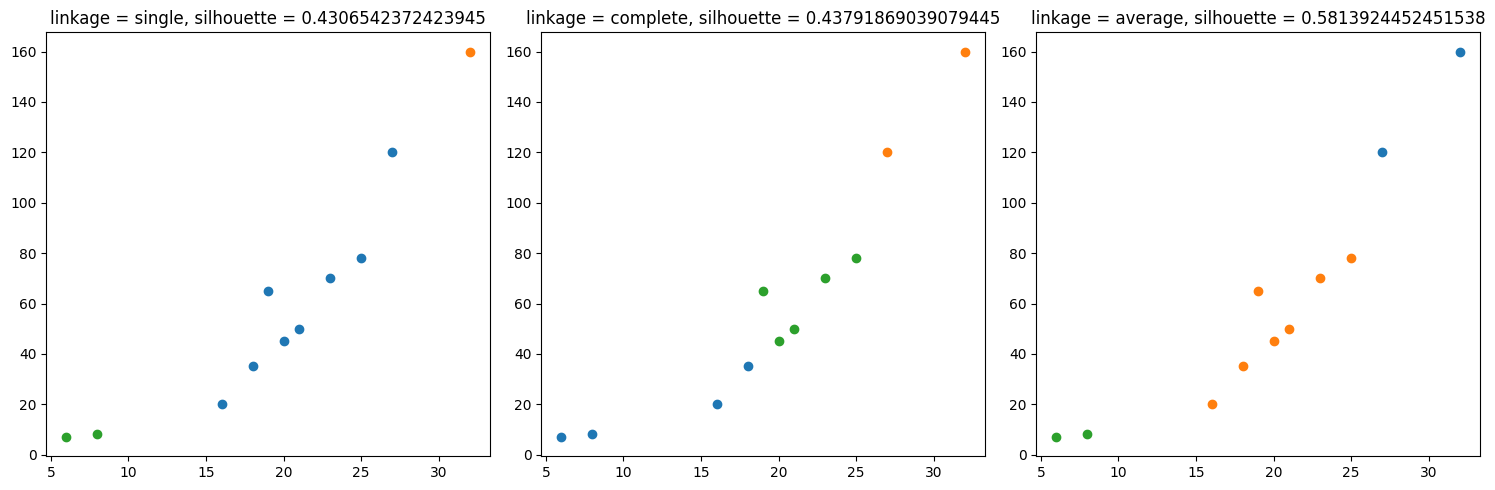

In [60]:
k = 3
linkage = ['single', 'complete', 'average']

fig = plt.figure(figsize = (15, 5))

for id, l in enumerate(linkage):
    ac = AgglomerativeClustering(n_clusters = k, linkage = l)
    ac.fit(X)

    fig.add_subplot(1, len(linkage), id + 1)

    for label in range(k):
        cluster = dogs[ac.labels_ == label]
        plt.scatter(cluster['height'], cluster['weight'])

    plt.title(f'linkage = {l}, silhouette = {silhouette_score(X, ac.labels_)}')

plt.tight_layout()


In [35]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [36]:
Z = linkage(X, method = 'average')

In [38]:
X = X.set_index(dogs['breed'])

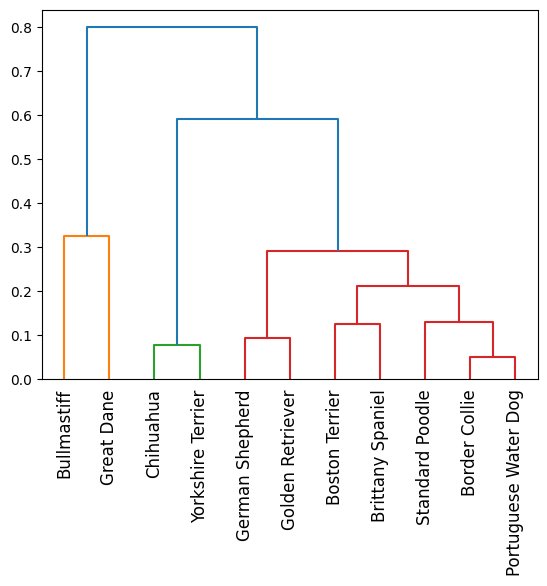

In [39]:
_ = dendrogram(Z, labels = X.index, leaf_rotation = 90)

In [45]:
from sklearn.cluster import DBSCAN

In [53]:
feature_names = dogs.columns[1:]
X = dogs[feature_names]
X = pd.DataFrame(scaler.fit_transform(X), columns = feature_names)
X

,height,weight
0,0.538462,0.248366
1,0.384615,0.084967
2,0.461538,0.183007
3,0.807692,0.738562
4,0.076923,0.006536
5,0.730769,0.464052
6,0.653846,0.411765
7,1.000000,1.000000
8,0.576923,0.281046
9,0.500000,0.379085


In [54]:
db = DBSCAN(eps = 0.1, min_samples = 2)

In [55]:
db.fit(X)

,eps,0.1
,min_samples,2
,metric,'euclidean'
,metric_params,None
,algorithm,'auto'
,leaf_size,30
,p,None
,n_jobs,None


In [58]:
db.labels_

array([ 0, -1, -1, -1,  1,  2,  2, -1,  0, -1,  1])

In [59]:
import numpy as np

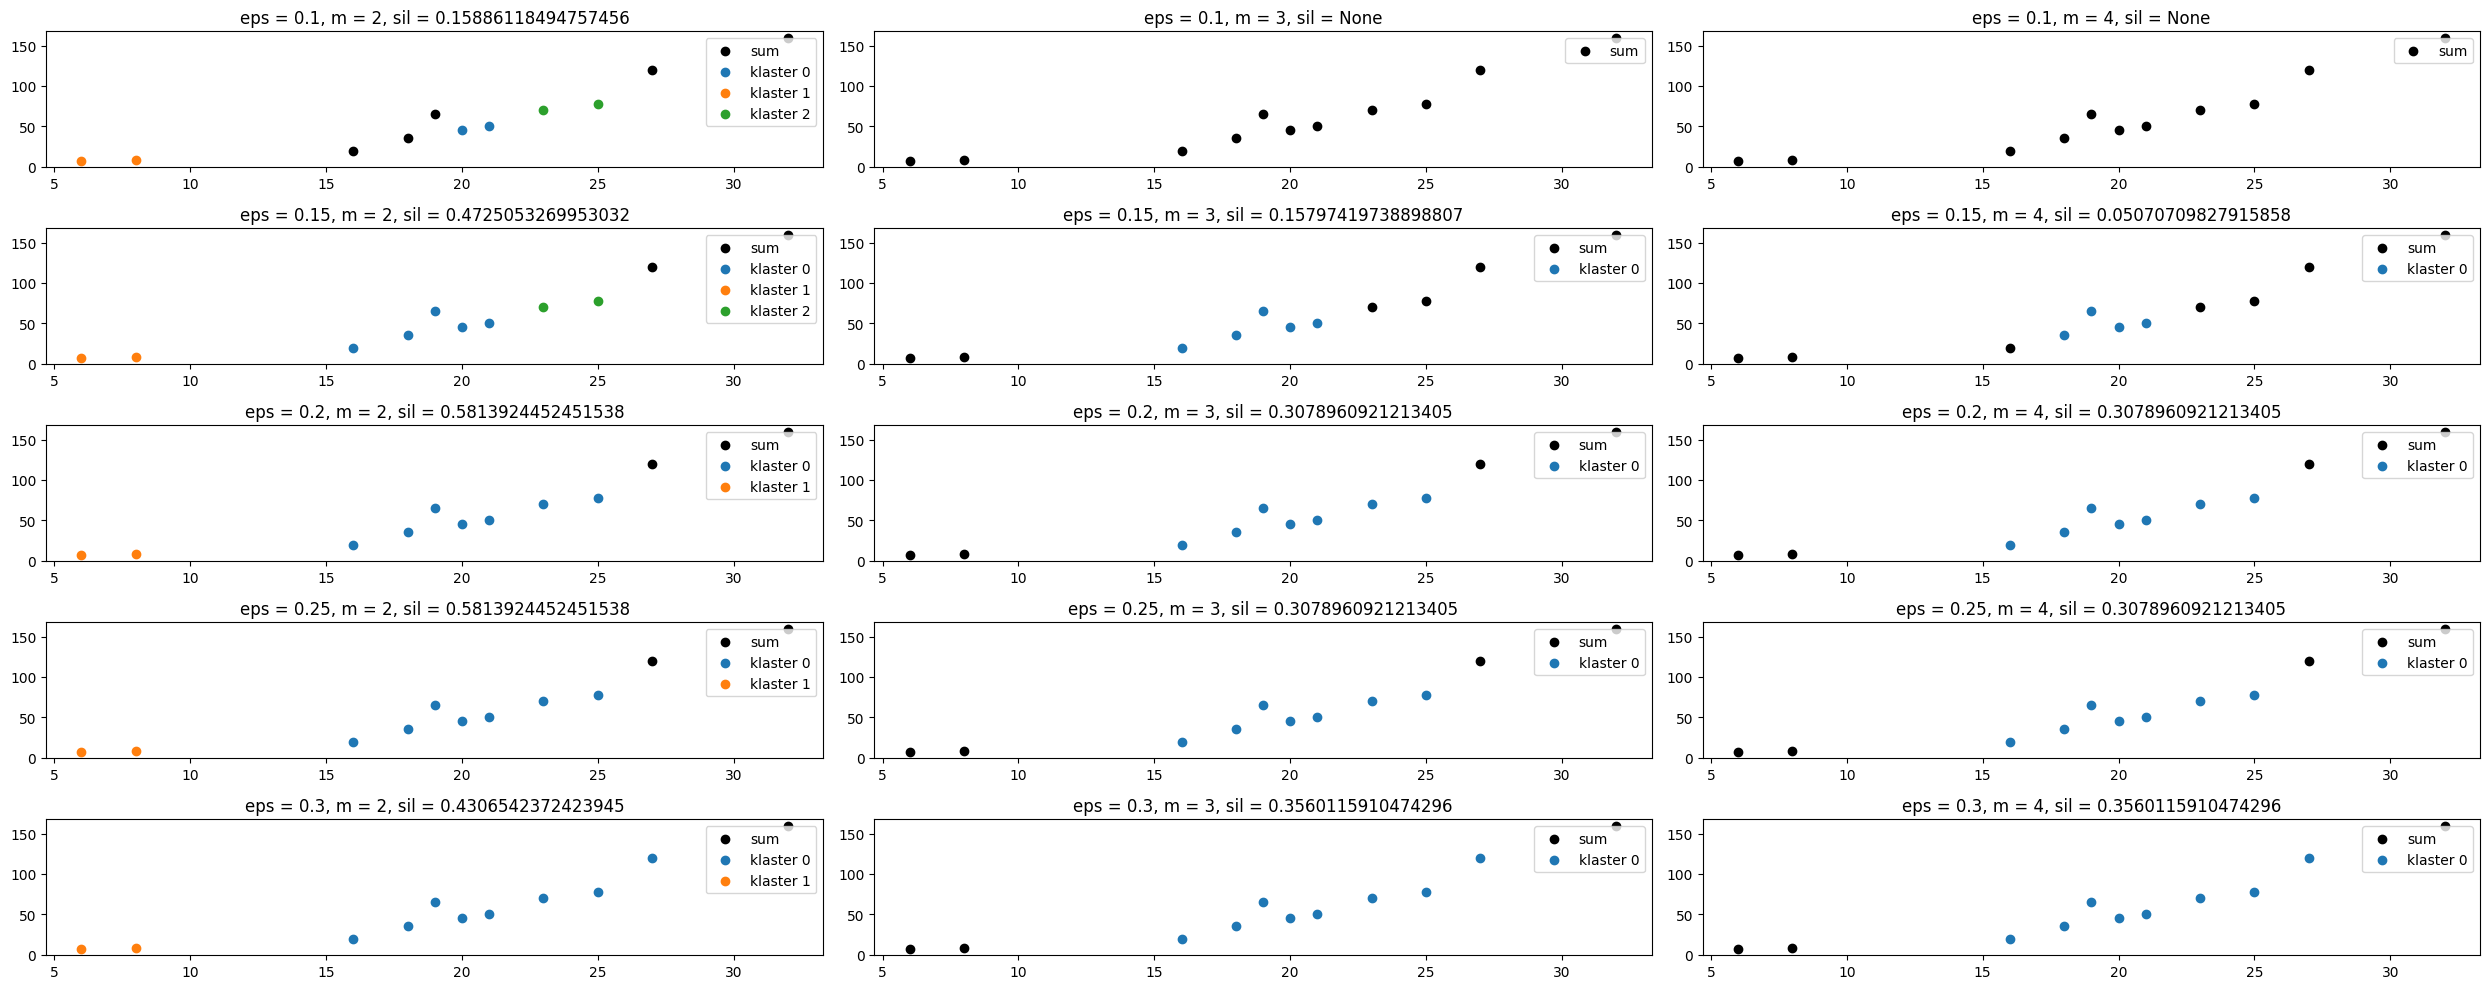

In [61]:
min_samples = 2
eps_values = [0.1, 0.15, 0.2, 0.25, 0.3]
min_samples_values = range(2,5)

fig = plt.figure(figsize = (25,10))
id = 1

for eps in eps_values:
    for min_samples in min_samples_values:
        model = DBSCAN(eps = eps, min_samples = min_samples)
        model.fit(X)

        fig.add_subplot(len(eps_values), len(min_samples_values), id)
        id += 1

        for cluster_label in np.unique(model.labels_):
            cluster = dogs[model.labels_ == cluster_label]
            if cluster_label == -1:
                plt.scatter(cluster['height'], cluster['weight'], color = 'black', label = 'sum')
            else:
                plt.scatter(cluster['height'], cluster['weight'], label = f'klaster {cluster_label}')

        plt.legend()

        if len(np.unique(model.labels_)) == 1:
            s = None
        else:
            s = silhouette_score(X, model.labels_)

        plt.title(f'eps = {eps}, m = {min_samples}, sil = {s}')

plt.tight_layout()